# Axora: Clinical Document Classification  
## Notebook 1: Exploratory Data Analysis (EDA) & Preprocessing  

---

In this notebook, we:  
1. Load the dataset.  
2. Perform exploratory data analysis (EDA).  
3. Build and fit a TF-IDF vectorizer.  
4. Save the fitted vectorizer for later use in classification and clustering. 


## 📚 Imports and Configurations  

In this step, we import all the necessary Python libraries and set up configurations for reproducibility and visualization:  

-  📊  *pandas, numpy* → data handling and numerical computations.  
- 📈 *matplotlib, seaborn* → plotting and visualization.  
- ☁ *wordcloud* → to generate word cloud visualizations of frequent words.  
- 📂 *datasets (Hugging Face)* → to load the medical transcriptions dataset.  
- 🤖 *scikit-learn (TfidfVectorizer, joblib)* → for text preprocessing and saving artifacts.  
- 🛠 *os, re, Counter* → utility libraries for saving files, tokenization, and word frequency analysis.  

We also:  
- 🎲 Set a consistent *random seed* (RANDOM_STATE=42) for reproducibility.  
- 🎨 Configure *plot aesthetics* (grid style, font size, figure size) for clear visuals.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import os
from collections import Counter
import re

# Plot aesthetics
sns.set(style="whitegrid", font_scale=1.05)
plt.rcParams["figure.figsize"] = (10, 6)

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Imports ready.")


Imports ready.


## 📂 Step 1: Load Dataset  
We use the *Hugging Face dataset*:  
[hpe-ai/medical-cases-classification-tutorial](https://huggingface.co/datasets/hpe-ai/medical-cases-classification-tutorial).  

📊 It contains 2,460 anonymized medical case transcriptions labeled with 13 medical specialties.  
The data is split into *train (1,720), **validation (370), and **test (370)* sets.

In [21]:
dataset = load_dataset("hpe-ai/medical-cases-classification-tutorial")

train_df = pd.DataFrame(dataset["train"])
val_df   = pd.DataFrame(dataset["validation"])
test_df  = pd.DataFrame(dataset["test"])

print("Dataset loaded.")
print("Train:", train_df.shape, "Val:", val_df.shape, "Test:", test_df.shape)


Repo card metadata block was not found. Setting CardData to empty.


Dataset loaded.
Train: (1724, 5) Val: (370, 5) Test: (370, 5)


## 🔍 Step 2: Exploratory Data Analysis (EDA)  

We analyze the dataset to understand:  
- 📊 The *class distribution* of medical specialties.  
- 📏 The *length of transcriptions*.  
- 📝 The most *frequent words* in the corpus.  
- ☁ Word clouds for visual insights per specialty.

### 📊 2.1 Class Distribution  
This shows how balanced (or imbalanced) the medical specialties are.

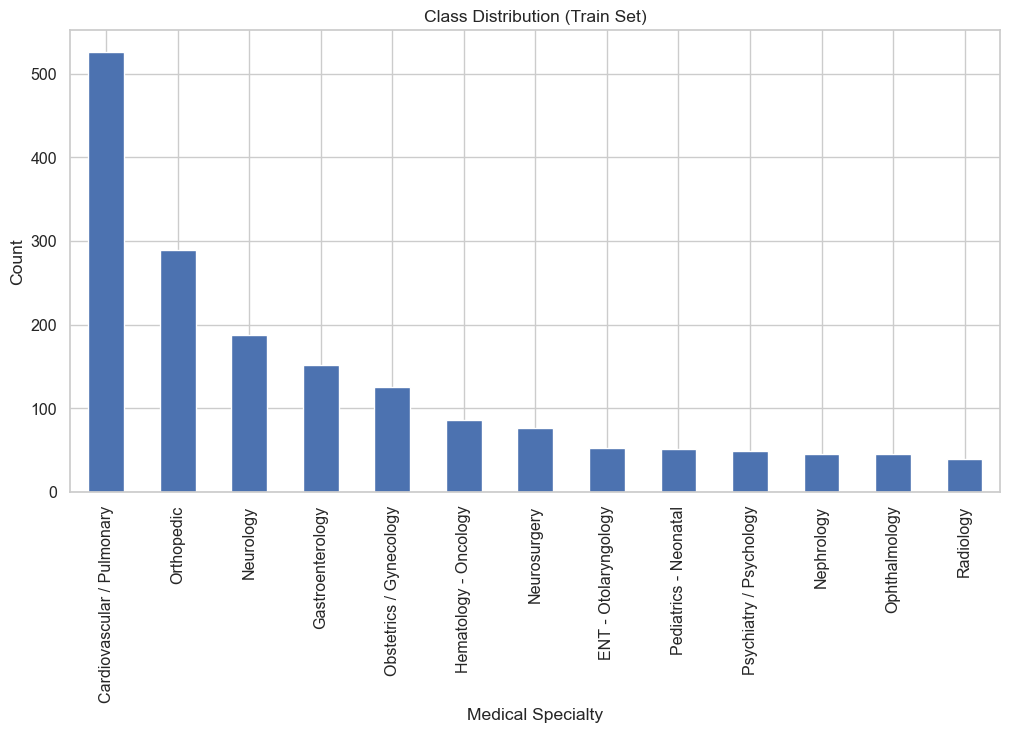

In [22]:
plt.figure(figsize=(12,6))
train_df["medical_specialty"].value_counts().plot(kind="bar")
plt.title("Class Distribution (Train Set)")
plt.xlabel("Medical Specialty")
plt.ylabel("Count")
plt.show()


### 📏 2.2 Text Length Distribution  
We check the number of words per transcription to see how varied the documents are.

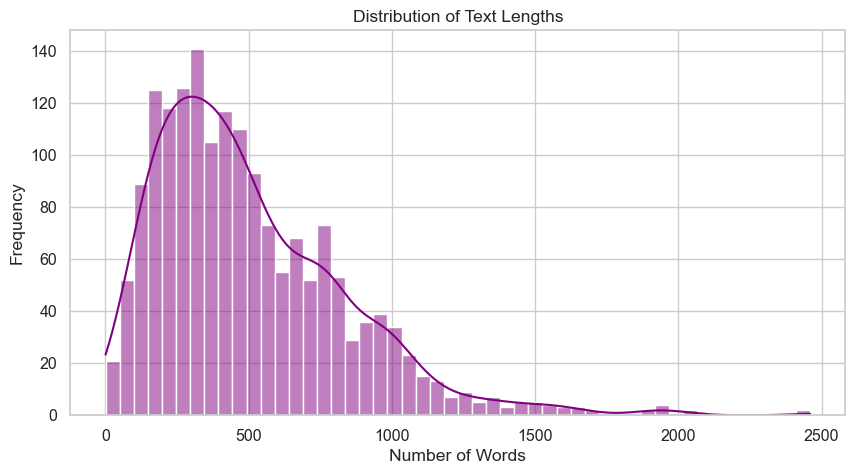

Average text length: 503.957656612529
Max text length: 2460


In [23]:
train_df["text_length"] = train_df["transcription"].str.split().map(len)
plt.figure(figsize=(10,5))
sns.histplot(train_df["text_length"], bins=50, kde=True, color="purple")
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

print("Average text length:", train_df["text_length"].mean())
print("Max text length:", train_df["text_length"].max())


### ☁ 2.3 Word Clouds  
Word clouds visualize the most frequent terms for selected specialties.

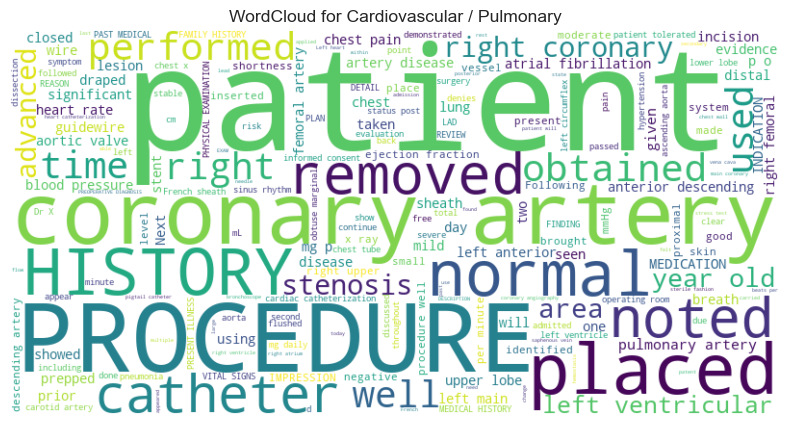

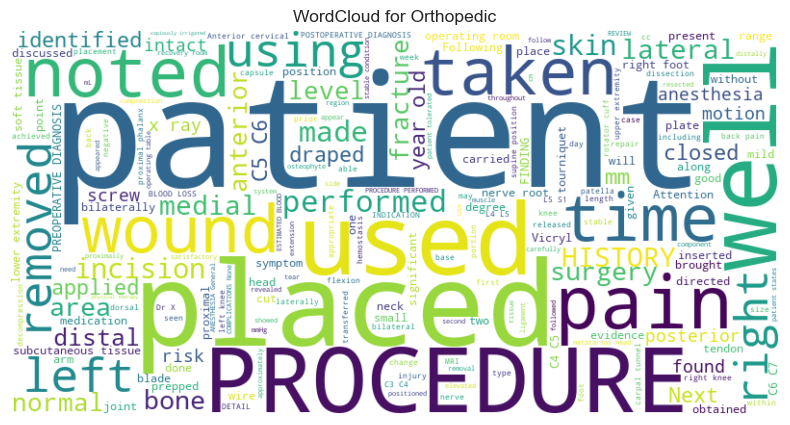

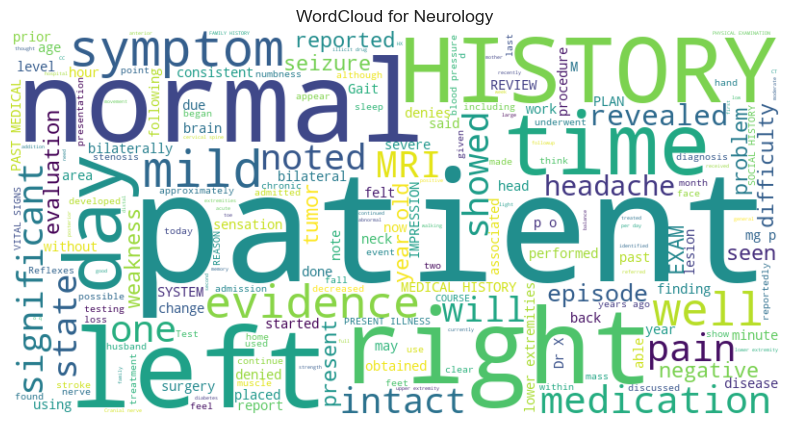

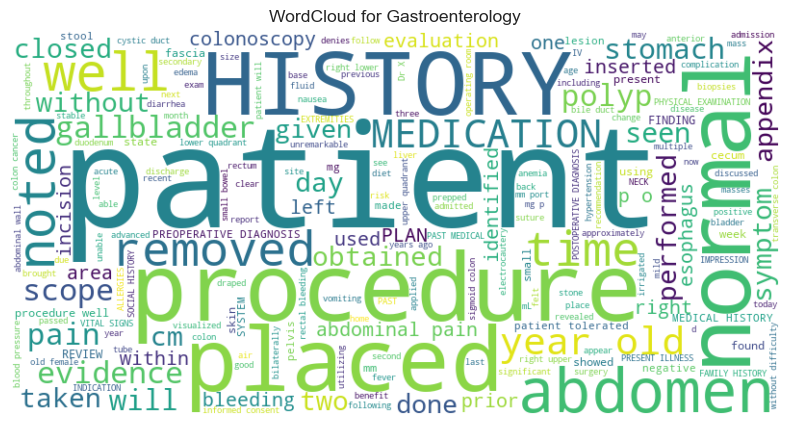

In [24]:
specialties = train_df["medical_specialty"].value_counts().index[:4]  # top 4 for readability
for spec in specialties:
    text = " ".join(train_df[train_df["medical_specialty"] == spec]["transcription"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {spec}")
    plt.show()
    

### 📝 2.4 Top 20 Most Common Words  
We tokenize text, count word frequencies, and plot the top 20.

C:\Users\DELL\AppData\Local\Temp\ipykernel_37148\3295899833.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="Blues_d")


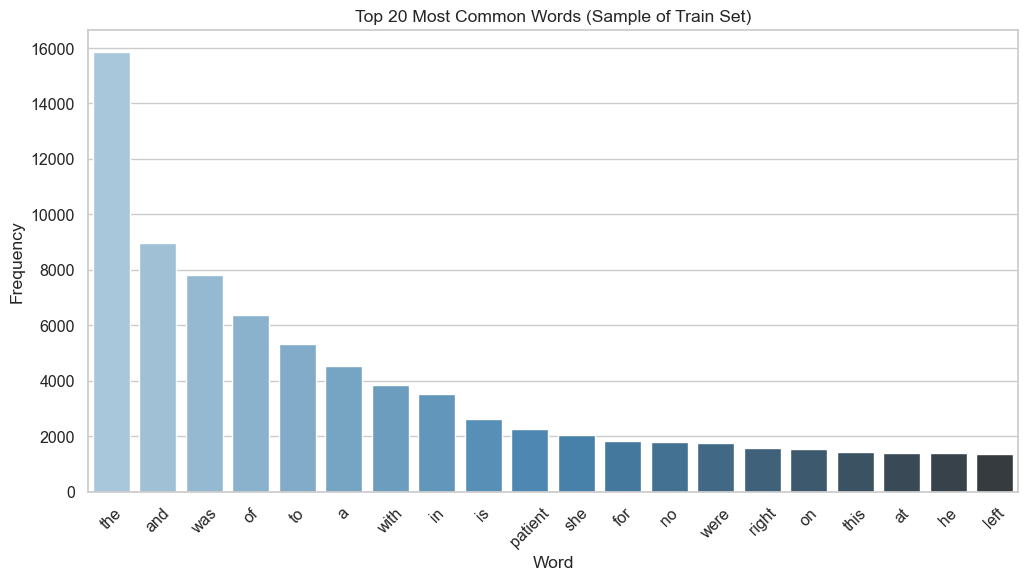

In [25]:
def tokenize(text):
    return re.findall(r"\b\w+\b", text.lower())

all_words = []
for text in train_df["transcription"].sample(500, random_state=RANDOM_STATE):  # sample for speed
    all_words.extend(tokenize(text))

word_freq = Counter(all_words).most_common(20)

words, counts = zip(*word_freq)
plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(counts), palette="Blues_d")
plt.title("Top 20 Most Common Words (Sample of Train Set)")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


## ⚙ Step 3: Preprocessing with TF-IDF  

We use *TfidfVectorizer* to convert transcriptions into numerical features:  
- 🔡 Lowercasing  
- 🛑 Removing English stop words  
-  🎚 Limiting features (min_df=5, max_df=0.8)

In [26]:
vectorizer = TfidfVectorizer(
    stop_words="english",
    lowercase=True,
    max_df=0.8,
    min_df=5
)

# Fit on training set
X_train = vectorizer.fit_transform(train_df["transcription"])
print("TF-IDF Shape (train):", X_train.shape)


TF-IDF Shape (train): (1724, 7568)


## 💾 Step 4: Save the Vectorizer  

We save the fitted vectorizer for reuse in:
- 📘 Notebook 2 (Classification) 
- 📗 Notebook 3 (Clustering)

In [27]:
joblib.dump(vectorizer, "tfidf_vectorizer.joblib")

print("✅ Vectorizer saved at tfidf_vectorizer.joblib")


✅ Vectorizer saved at tfidf_vectorizer.joblib
